In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

pupils = pd.read_csv('stud_math.csv')

In [2]:
# school — аббревиатура школы, в которой учится ученик
# sex — пол ученика ('F' - женский, 'M' - мужской)
# age — возраст ученика (от 15 до 22)
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
#        3 - среднее специальное или 11 классов, 4 - высшее)
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 
#        3 - среднее специальное или 11 классов, 4 - высшее)
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 
#        'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 
#        'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
#        'course' - образовательная программа, 'other' - другое)
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 
#              3 - 30-60 мин., 4 - >60 мин.)
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 
#             3 - 5-10 часов, 4 - >10 часов)
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# schoolsup — дополнительная образовательная поддержка (yes или no)
# famsup — семейная образовательная поддержка (yes или no)
# paid — дополнительные платные занятия по математике (yes или no)
# activities — дополнительные внеучебные занятия (yes или no)
# nursery — посещал детский сад (yes или no)
# higher — хочет получить высшее образование (yes или no)
# internet — наличие интернета дома (yes или no)
# romantic — в романтических отношениях (yes или no)
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# absences — количество пропущенных занятий
# score — баллы по госэкзамену по математике

In [3]:
def top_freq(col):
    top_value = col.describe().top
    col = col.fillna(top_value)
    return col


def creating_dict_2col(col1, col2):
    dict_2col = {}
    pupils_2col = pd.DataFrame(pupils[[col1, col2]])
    pupils_2col.dropna(axis=0, inplace=True)
    for i in range(len(pupils_2col)):
        value1 = int(pupils_2col.iloc[i][0])
        value2 = int(pupils_2col.iloc[i][1])
        if (value1, value2) in dict_2col:
            dict_2col[(value1, value2)] += 1
        else:
            dict_2col[(value1, value2)] = 1
    return dict_2col


def fillnaCol1Col2(col1, col2, dict1, dict2):
    for ind in col1.index:
        if str(col1.iloc[ind]) == 'nan':
            col1.iloc[ind] = dict2[int(col2.iloc[ind])]
        if str(col2.iloc[ind]) == 'nan':
            col2.iloc[ind] = dict1[int(col1.iloc[ind])]
    return col1, col2


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=pupils.loc[pupils.loc[:, column].isin(
                    pupils.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    cols = pupils.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(pupils.loc[pupils.loc[:, column] == comb[0], 'score'],
                     pupils.loc[pupils.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [4]:
# Рассмотрим исходный датафрейм
display(pupils)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [5]:
# определим размер датафрейма
print(
    f'Размер исходного датафрейма {pupils.shape[0]} строк(записей) и {pupils.shape[1]} столбцов(атрибутов).')

Размер исходного датафрейма 395 строк(записей) и 30 столбцов(атрибутов).


In [6]:
# Рассмотрим сколько непустых значений в каждом атрибуте из 395 максимальных
print(pupils.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [7]:
# Посмотрим теперь сколько пустых значений по каждому атрибуту
print(pupils.isna().sum())

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64


In [8]:
# определим максимальное значение незаполненных записей в одном атрибуте
print(
    f'В исходном датафрейме максимальное количество незаполненных значений в столбце(атрибуте) составляет {pupils.isna().sum().max()} записей, ')
print(
    f'что соответствует {round(pupils.isna().sum().max()/pupils.shape[0]*100, 2)} % всех значений атрибута')

В исходном датафрейме максимальное количество незаполненных значений в столбце(атрибуте) составляет 45 записей, 
что соответствует 11.39 % всех значений атрибута


In [9]:
# Попробуем заполнить пропуски в атрибутах
# Сначала обработаем категориальные атрибуты
display(pupils.describe(include='object'))
pupils_str = list(pupils.select_dtypes('object').columns)
print(f'В исходном датасете {len(pupils_str)} категориальных атрибутов,')
print('незаполненных значений по каждому атрибуту:')
print(pupils[pupils_str].isna().sum())

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


В исходном датасете 17 категориальных атрибутов,
незаполненных значений по каждому атрибуту:
school         0
sex            0
address       17
famsize       27
Pstatus       45
Mjob          19
Fjob          36
reason        17
guardian      31
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
dtype: int64


In [10]:
# Заполним пропущенные значения категориальных атрибутов самыми частыми значениями соответствующего атрибута
pupils_str_short = ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for name in pupils_str_short:
    pupils[name] = top_freq(pupils[name])

# Проверим отстутствие пропусков в категориальных атрибутах
print(pupils[pupils_str_short].isna().sum())

address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64


In [11]:
# Теперь обработаем числовые атрибуты
display(pupils.describe(include=np.number))
pupils_num = list(pupils.select_dtypes('number').columns)
print(f'В исходном датасете {len(pupils_num)} числовых атрибутов,')
print('незаполненных значений по каждому атрибуту:')
print(pupils[pupils_num].isna().sum())

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


В исходном датасете 13 числовых атрибутов,
незаполненных значений по каждому атрибуту:
age                     0
Medu                    3
Fedu                   24
traveltime             28
studytime               7
failures               22
studytime, granular     7
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64


In [12]:
# пропусков по атрибуту age нет, и все его значения услкдываются в возраст от 15 до 22 лет
# по атрибуту Medu 3 пропуска, по Fedu 24 пропуска, при этом, судя по максимальному значению 40 - есть неверные данные 
# (по условию, этот татрибут может принимать только значения 0, 1, 2, 3, 4)
display(pupils.Fedu[pupils.Fedu > 4])

11    40.0
Name: Fedu, dtype: float64

In [13]:
# такой вынос единственный, и судя, по всему, это просто ошибка набора, заменим значение Fedu = 40 на 4
pupils.Fedu = pupils.Fedu.replace(40, 4)

In [14]:
# рассмотрим возможные комбинации атрибутов Medu и Fedu
MF = creating_dict_2col('Medu', 'Fedu')
print(MF)

{(4, 4): 63, (1, 1): 36, (4, 2): 18, (3, 3): 34, (4, 3): 39, (2, 2): 47, (3, 2): 25, (3, 4): 18, (2, 4): 7, (2, 3): 17, (2, 1): 27, (1, 2): 13, (3, 1): 13, (4, 0): 1, (1, 3): 5, (0, 1): 1, (1, 0): 1, (0, 2): 2, (1, 4): 1}


In [15]:
# создадим словари m_ed, f_ed, определяющие наиболее часто встречаемое значение образования второго родителя, 
# по данным образования первого родителя
m_ed = {0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
f_ed = {0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
for i in range(5):
    s = m_ed[i]
    j_max = -1
    for j in range(5):
        if (i, j) in MF.keys():
            if MF[(i, j)] > s:
                s = MF[(i, j)]
                j_max = j
    m_ed[i] = j_max


for j in range(5):
    s = f_ed[j]
    i_max = -1
    for i in range(5):
        if (i, j) in MF.keys():
            if MF[(i, j)] > s:
                s = MF[(i, j)]
                i_max = i
    f_ed[j] = i_max

print('m_ed:', m_ed)
print('f_ed:', f_ed)

m_ed: {0: 2, 1: 1, 2: 2, 3: 3, 4: 4}
f_ed: {0: 1, 1: 1, 2: 2, 3: 4, 4: 4}


In [16]:
# заполним пропуски атрибутов Medu и Fedu, используя полученные словари m_ed, f_ed
pupils.Medu, pupils.Fedu = fillnaCol1Col2(pupils.Medu, pupils.Fedu, m_ed, f_ed)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
# проверим, убрались ли пропуски в рассматриваемых атрибутах
print(pupils[['Medu', 'Fedu']].isna().sum())

Medu    0
Fedu    0
dtype: int64


In [18]:
# заполним пропуски в атрибутах traveltime, studytime, failures, famrel, freetime, goout, health, absences 
# неиболее встречающимся значением в соответствющем атрибуте
pupils_num_short = ['traveltime', 'studytime', 'failures',
                    'famrel', 'freetime', 'goout', 'health', 'absences']
for name in pupils_num_short:
    pupils[name].fillna(pupils[name].value_counts().index[0], inplace=True)

In [19]:
# с учетом того, что атрибут score является предсказываемым, пропуски в нем, являются основанием 
# для удаления из изучаемого датафрейма
pupils.dropna(subset=['score'], axis=0, inplace=True)
print(pupils[pupils_num].isna().sum())

age                    0
Medu                   0
Fedu                   0
traveltime             0
studytime              0
failures               0
studytime, granular    7
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64


In [20]:
# произведем замену в атрибутах, где значения могут быть только yes/no на 1/0 для удобства обработки информации
pupils_yes = ['schoolsup', 'famsup', 'paid', 'activities',
              'nursery', 'higher', 'internet', 'romantic']
for name in pupils_yes:
    pupils[name] = pupils[name].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
# рассмотрим получившийся датафрейм
display(pupils)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,0,1,1,0,1,-6.0,1,0,0,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0,0,0,0,0,-3.0,1,1,0,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,0,0,0,0,0,-3.0,1,0,0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0,0,0,1,0,-3.0,1,1,0,4.0,4.0,1.0,5.0,0.0,50.0


In [22]:
# рассмотрим атрибут farmel, кажется там есть вынос
pupils.famrel.value_counts()

 4.0    205
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [23]:
# так и есть, одно из значений равно -1, при том, что все значения должны находиться в диапазоне от 1 до 5
# логично предположить, что знаки минуса там появился случайно, заменим значение -1 на 1
pupils.famrel = pupils.famrel.apply(lambda x: -x if x < 0 else x)
pupils.famrel.value_counts()

4.0    205
5.0     97
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [24]:
# рассмотрим корреляцию числовых атрибутов
corr = pupils.corr()
display(corr)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146820,-0.160785,0.076013,-0.018019,0.206279,-0.257442,-0.145575,-0.016857,-0.125275,-0.087478,0.018227,-0.209497,-0.116484,0.162512,0.056941,0.013994,0.121057,-0.061752,0.095166,-0.155726
Medu,-0.146820,1.000000,0.647119,-0.148961,0.076482,-0.239626,-0.038294,0.192731,0.140291,0.106884,0.169659,-0.077065,0.179823,0.208866,0.015604,-0.001180,0.033753,0.066989,-0.057083,-0.009945,0.218313
Fedu,-0.160785,0.647119,1.000000,-0.117228,0.008975,-0.258378,0.047391,0.189841,0.075579,0.109105,0.159578,-0.008958,0.181669,0.146794,-0.008190,-0.011245,0.001403,0.059619,0.004733,0.021326,0.138523
traveltime,0.076013,-0.148961,-0.117228,1.000000,-0.098226,0.035113,0.002564,0.003883,-0.036997,0.006544,-0.037454,0.099356,-0.076451,-0.074267,0.035648,-0.029213,-0.016696,0.046390,-0.035336,-0.037054,-0.056535
studytime,-0.018019,0.076482,0.008975,-0.098226,1.000000,-0.169399,0.039144,0.108577,0.210213,0.101879,0.090573,-1.000000,0.166190,0.043815,0.049933,0.037950,-0.122057,-0.053554,-0.063876,-0.024045,0.114295
failures,0.206279,-0.239626,-0.258378,0.035113,-0.169399,1.000000,0.020515,-0.063403,-0.164162,-0.076340,-0.092902,0.170933,-0.270493,-0.072924,0.109206,-0.028517,0.087558,0.101036,0.079030,0.056706,-0.337187
schoolsup,-0.257442,-0.038294,0.047391,0.002564,0.039144,0.020515,1.000000,0.097735,-0.020182,0.093931,0.033040,-0.040288,0.050082,0.020636,-0.058209,-0.009768,-0.052964,-0.038818,-0.048194,0.112305,-0.086598
famsup,-0.145575,0.192731,0.189841,0.003883,0.108577,-0.063403,0.097735,1.000000,0.233238,-0.037966,0.044423,-0.109466,0.085340,0.091641,0.042813,0.006285,0.024763,-0.041586,0.012043,0.073597,0.005992
paid,-0.016857,0.140291,0.075579,-0.036997,0.210213,-0.164162,-0.020182,0.233238,1.000000,-0.000244,0.122638,-0.212738,0.182459,0.145488,0.052311,-0.005738,-0.039865,0.042117,-0.070115,-0.008207,0.096306
activities,-0.125275,0.106884,0.109105,0.006544,0.101879,-0.076340,0.093931,-0.037966,-0.000244,1.000000,-0.015817,-0.103065,0.073160,0.075772,-0.034738,0.048164,0.078678,0.027675,0.011977,-0.083030,0.003147


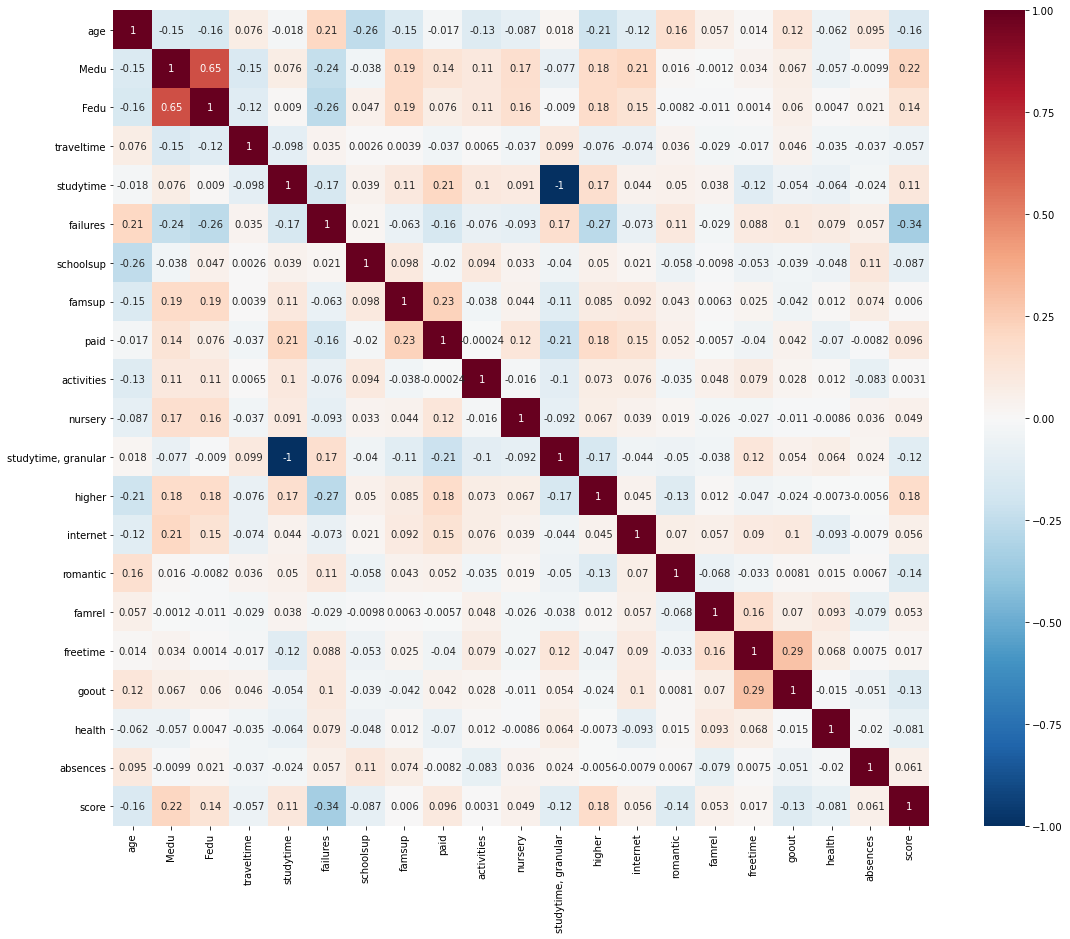

In [25]:
# построим тепловую карту корреляции
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.2g', cmap=sns.color_palette(
    "RdBu_r", 1000), vmin=-1, vmax=1, center=0, square=True)

In [26]:
# значение одного из атрибутов studytime, granular - не представлено в описании, но если из таблицы 
# и карты корреляции, то видим, что атрибуты 'studytime' и 'studytime, granular' имеют 100% обратную 
# корреляцию, а значит, этот атрибут можно смело удалить
pupils.drop('studytime, granular', axis=1, inplace=True)

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

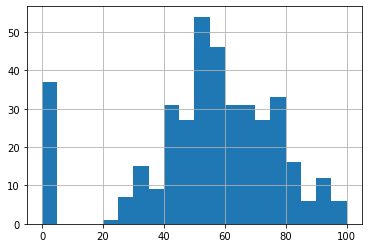

In [27]:
# осталось прояснить ситуацуию с атрибутом для прогноза score, рассмотрим гистрограмму распределений его значений
name = 'score'
pupils[name].hist(bins=20)
pupils[name].describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, медиана: 55.0 IQR: 30.0, Границы выбросов: [-5.0, 115.0].


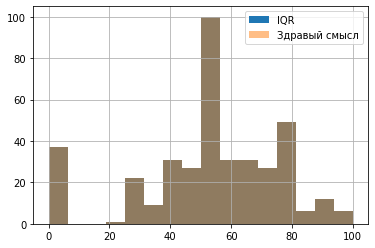

In [28]:
# есть подозрения, что значение score = 0 выбивается из общей картины, и похоже на вынос
# проверим это, используя средства статистики
median = pupils.score.median()
perc25 = pupils.score.quantile(0.25)
perc75 = pupils.score.quantile(0.75)
IQR = perc75 - perc25
print(
    f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, медиана: {median} IQR: {IQR}, Границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}].')

pupils.score.loc[pupils.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 100), label='IQR')
pupils.score.loc[pupils.score <= 100].hist(
    alpha=0.5, bins=16, range=(0, 100), label='Здравый смысл')
plt.legend()

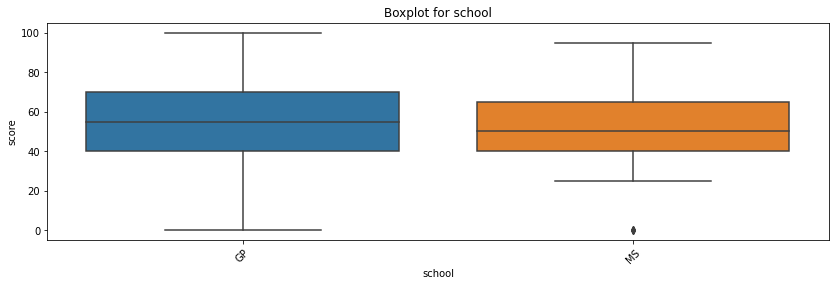

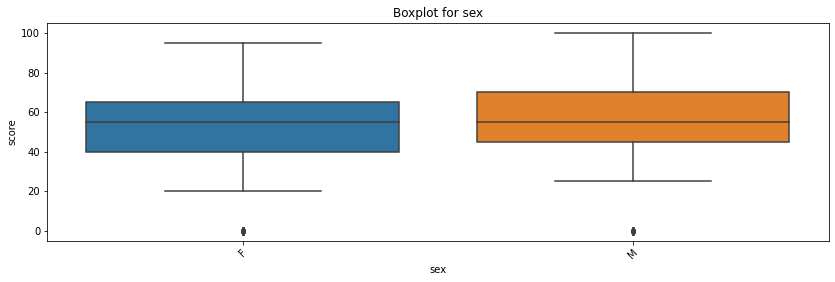

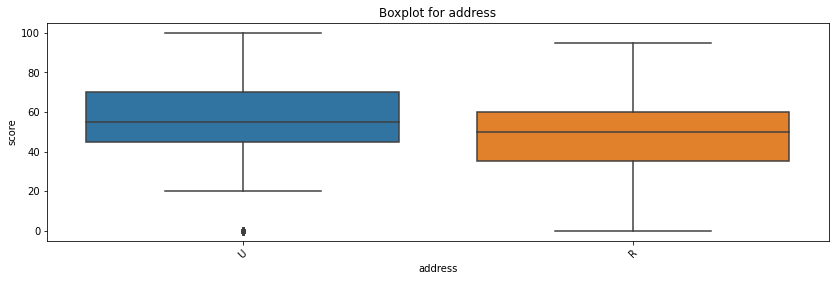

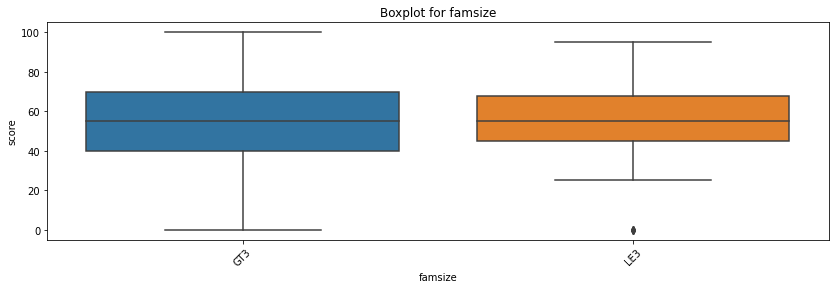

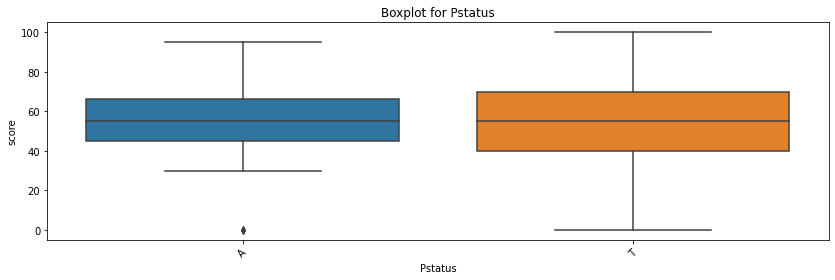

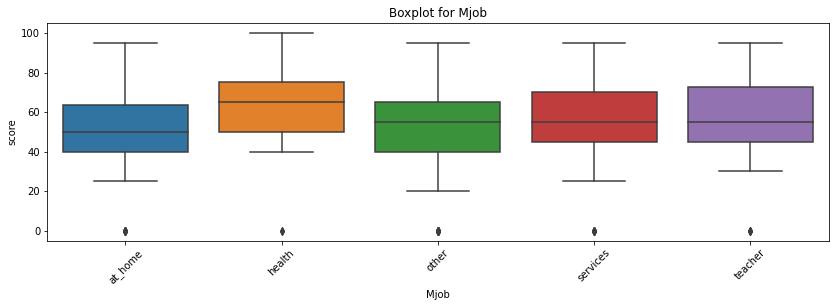

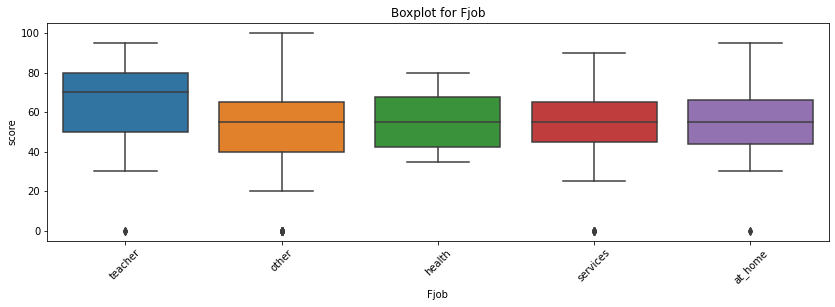

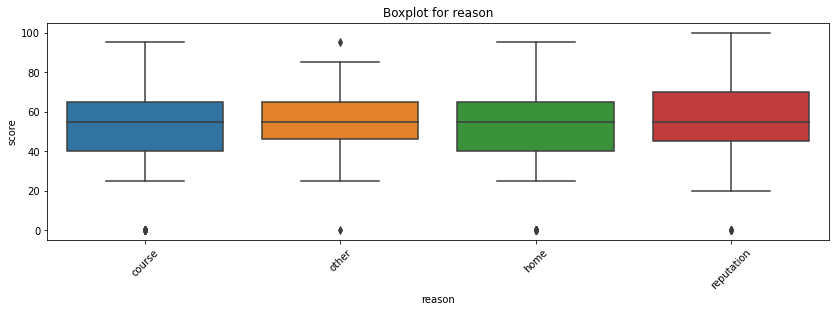

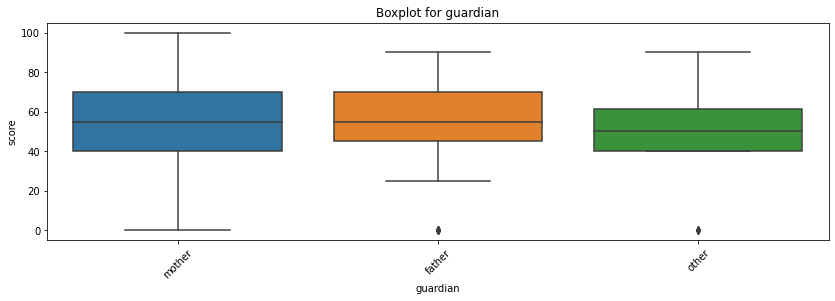

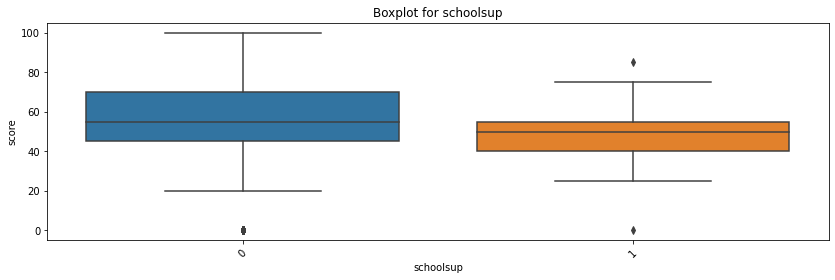

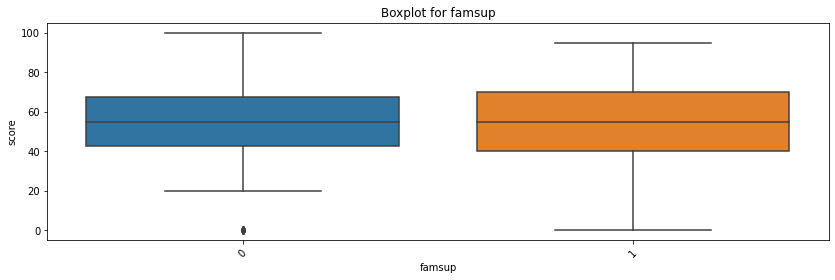

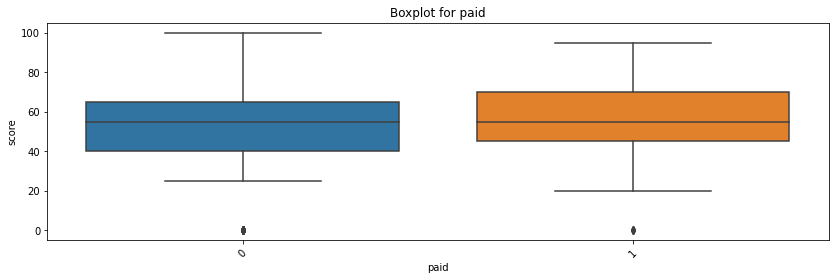

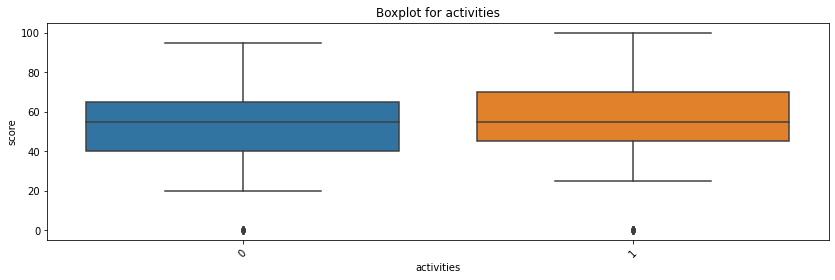

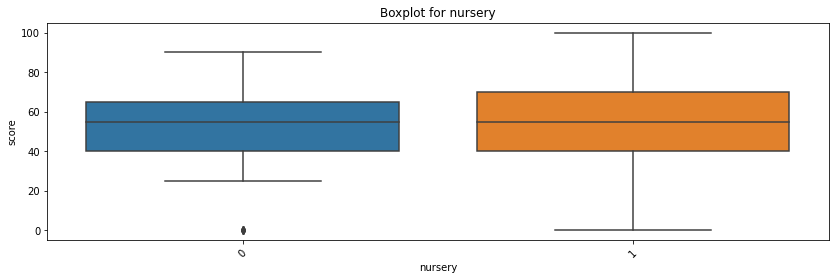

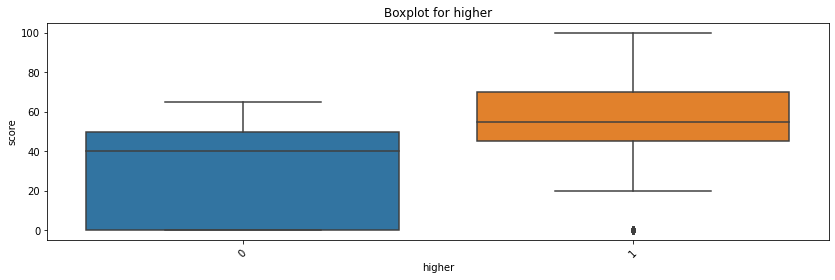

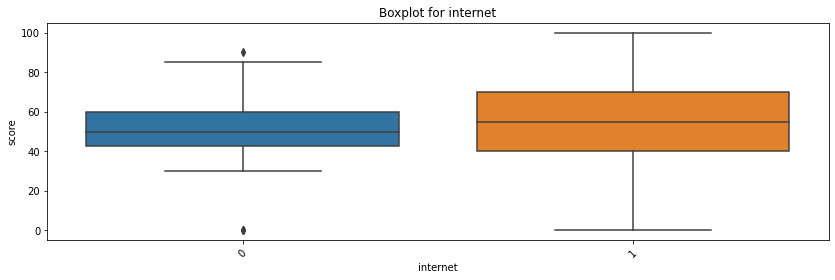

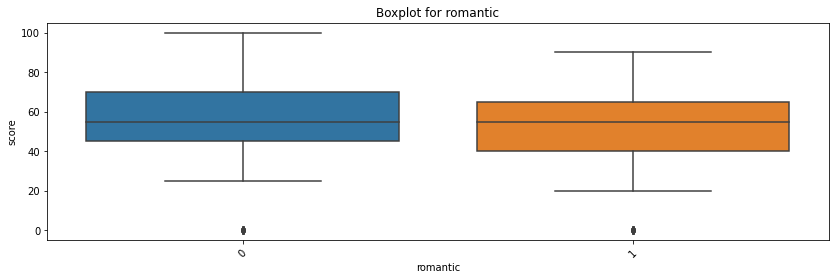

In [29]:
# Вывод: все значения атрибута score в датафрейме лежат в пределах доверительного интервала, выносов нет


# построим боксплоты для всех категориальных атрибутов
for col in pupils_str:
    get_boxplot(col)

In [30]:
# С помощью теста Стьюдента рассмотрим есть ли статистическая разница в распределении оценок по категориальным атрибутам.
# Проверим нулевую гипотезу о том, что распределения значений категориальных атрибутов по различным параметрам неразличимы:
for col in list(pupils.select_dtypes('object').columns):
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob


In [31]:
# Только 2 атрибута : address,  Mjob оказывают влияние на прогнозный атрибут score.
# Создадим новый датасет, в который войдут эти два категориальных атрибута и все нескоррелированные количественные атрибуты
pupils_for_model = pupils.loc[:, ([
                                  'address', 'Mjob'] + list(pupils.select_dtypes('number').columns))]

In [32]:
# для удобства работы переименуем все наименования столбцов с большой буквы в аналогичные, но с маленькой буквы
pupils_for_model.rename(
    columns={'Mjob': 'mjob', 'Medu': 'medu', 'Fedu': 'fedu'}, inplace=True)
# проведем реиндексацию датафрейма
pupils_for_model.reindex(range(len(pupils_for_model)))
# итоговый датафрейм:
display(pupils_for_model)

,address,mjob,age,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,U,at_home,18,4.0,4.0,2.0,2.0,0.0,1,0,0,0,1,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,U,at_home,17,1.0,1.0,1.0,2.0,0.0,0,1,0,0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,U,at_home,15,1.0,1.0,1.0,2.0,3.0,1,0,0,0,1,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,U,health,15,4.0,2.0,1.0,3.0,0.0,0,1,1,1,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,U,other,16,3.0,3.0,1.0,2.0,0.0,0,1,1,0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,U,services,20,2.0,2.0,1.0,2.0,2.0,0,1,1,0,1,1,0,0,5.0,5.0,4.0,4.0,212.0,45.0
391,U,services,17,3.0,1.0,2.0,1.0,0.0,0,0,0,0,0,1,1,0,2.0,4.0,5.0,2.0,3.0,80.0
392,R,other,21,1.0,1.0,1.0,1.0,3.0,0,0,0,0,0,1,0,0,5.0,5.0,3.0,3.0,3.0,35.0
393,R,services,18,3.0,2.0,3.0,1.0,0.0,0,0,0,1,0,1,1,0,4.0,4.0,1.0,5.0,0.0,50.0


In [33]:
# убедимся, что итоговый датафрейм не содержит пропусков
pupils_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     389 non-null    object 
 1   mjob        389 non-null    object 
 2   age         389 non-null    int64  
 3   medu        389 non-null    float64
 4   fedu        389 non-null    float64
 5   traveltime  389 non-null    float64
 6   studytime   389 non-null    float64
 7   failures    389 non-null    float64
 8   schoolsup   389 non-null    int64  
 9   famsup      389 non-null    int64  
 10  paid        389 non-null    int64  
 11  activities  389 non-null    int64  
 12  nursery     389 non-null    int64  
 13  higher      389 non-null    int64  
 14  internet    389 non-null    int64  
 15  romantic    389 non-null    int64  
 16  famrel      389 non-null    float64
 17  freetime    389 non-null    float64
 18  goout       389 non-null    float64
 19  health      389 non-null    f

In [34]:
# Выводы:
# 1. Исходный датафрейм содержал некоторое количество пропусков, которые в процессе подготовки 
#    были заполнены по тем или иным принципам, описанным выше
# 2. Категориальные атрибуты вида yes/no были заменены на количественные типа 1/0
# 3. Строки в которых отсутствовали значения у атрибута score были удалены как непригодные для изучения
# 4. Был удален атрибут, имевший корреляцию с другим атрибутом
# 5. Статистическими методами были определы атрибуты, оказывающие влияние на итоговый атрибут score 
#    среди категориальных атрибутов,только эти категориальные атрибуты были оставлены в итоговой базе
# 6. Итоговый датафрем содержит 389 записей и 22 атрибута: 2 из которых категориальные и 20 количественные.

In [35]:
# P.S. мои мысли на вольную тему
# мне не нравится работать с графическим представлением исследуемой информации на этапе исследования,
# для меня более практичным является аналитический подход к выводам: использование различных методов, 
# обработок данных, позволяющих выявлять выбросы, корреляцию одной колонки с другой и т.д.